In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Cleaning the monthly asylum data

In [3]:
handle = pd.read_table("../data/asylum_monthly.tsv")

In [4]:
asyl_monthly = handle.copy()
# asyl_monthly

In [5]:
deconstructed_first_column = [
    line.split(",") for line in asyl_monthly[asyl_monthly.columns[0]]
]
# deconstructed_first_column

In [6]:
colum1_list = asyl_monthly.columns[0].split(",")
# colum1_list

In [7]:
asyl_monthly = asyl_monthly.drop(asyl_monthly.columns[0], axis=1)
# asyl_monthly

In [8]:
first_column = pd.DataFrame(deconstructed_first_column, columns=colum1_list)
# first_column

In [9]:
first_column = first_column.drop(["unit"], axis=1)

monthly_asylum = pd.concat([first_column, asyl_monthly], axis=1)
monthly_asylum

,citizen,sex,age,asyl_app,geo\time,2023M03,2023M02,2023M01,2022M12,2022M11,...,2008M10,2008M09,2008M08,2008M07,2008M06,2008M05,2008M04,2008M03,2008M02,2008M01
0,AD,F,TOTAL,ASY_APP,AT,:,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AD,F,TOTAL,ASY_APP,BE,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AD,F,TOTAL,ASY_APP,BG,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AD,F,TOTAL,ASY_APP,CH,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AD,F,TOTAL,ASY_APP,CY,:,0,0,0,0,...,0 d,0 d,0 d,0 d,0 d,0 d,0 d,0 d,0 d,0 d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643771,ZW,UNK,Y_LT18,SSEQ,PL,0,0,:,0,0,...,:,:,:,:,:,:,:,:,:,:
643772,ZW,UNK,Y_LT18,SSEQ,PT,:,0,0,0,0,...,:,:,:,:,:,:,:,:,:,:
643773,ZW,UNK,Y_LT18,SSEQ,RO,:,0,0,0,0,...,:,:,:,:,:,:,:,:,:,:
643774,ZW,UNK,Y_LT18,SSEQ,SI,0,0,0,0,0,...,:,:,:,:,:,:,:,:,:,:


In [10]:
monthly_asylum = monthly_asylum.rename(
    columns={"citizen": "from", monthly_asylum.columns[4]: "to"}
)

In [11]:
# monthly_asylum['sex'].value_counts()

In [12]:
# monthly_asylum['age'].value_counts()

In [13]:
# monthly_asylum['asyl_app'].value_counts()

In [14]:
# monthly_asylum['citizen'].value_counts()

In [15]:
# Selecting all sexes
monthly_asylum = monthly_asylum[monthly_asylum["sex"] == "T"]

# Selecting all ages
monthly_asylum = monthly_asylum[monthly_asylum["age"] == "TOTAL"]

# Selecting only the first time applicants
monthly_asylum = monthly_asylum[monthly_asylum["asyl_app"] == "NASY_APP"]

# droping all these features as the only have one value now
monthly_asylum = monthly_asylum.drop(["sex", "age", "asyl_app"], axis=1)

# Reseting index now
monthly_asylum = monthly_asylum.reset_index(drop=True)

monthly_asylum

,from,to,2023M03,2023M02,2023M01,2022M12,2022M11,2022M10,2022M09,2022M08,...,2008M10,2008M09,2008M08,2008M07,2008M06,2008M05,2008M04,2008M03,2008M02,2008M01
0,AD,AT,:,0,0,0,0,0,0,0,...,:,:,:,:,:,:,:,:,:,:
1,AD,BE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AD,BG,0,0,0,0,0,0,0,0,...,:,:,:,:,:,:,:,:,:,:
3,AD,CH,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AD,CY,:,0,0,0,0,0,0,0,...,0 d,0 d,0 d,0 d,0 d,0 d,0 d,0 d,0 d,0 d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,ZW,RO,:,0,0,0,0,0,0,0,...,:,:,:,:,:,:,:,:,:,:
7068,ZW,SE,0,0,0,0,0,0,5,5,...,0,0,5,5,0,0,0,0,0,0
7069,ZW,SI,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7070,ZW,SK,:,0,0,0,0,0,0,0,...,:,:,:,:,:,:,:,:,:,:


### Here we define the best indexing format to tidly handle this data frame

In [16]:
# We ['from','to'] the dyad values to the index
monthly_asylum = monthly_asylum.set_index(["from", "to"])
# We transpose it so the months columns are now the vertical index
# and the dyads are accesible as horizontal indexes
monthly_asylum = monthly_asylum.T
monthly_asylum = monthly_asylum.rename_axis("date")
# We convert the date index to datetime format
monthly_asylum.index = monthly_asylum.index.str.strip()
monthly_asylum.index = pd.to_datetime(monthly_asylum.index, format="%YM%m").strftime(
    "%Y-%m"
)

In [17]:
monthly_asylum

from     AD                                       ...  ZW                      \
to       AT  BE  BG  CH   CY  CZ  DE  DK  EE  EL  ...  MT  NL  NO  PL  PT  RO   
date                                              ...                           
2023-03  :   0   0   0    :   :   0   0   0   :   ...  :   0   0   0   :   :    
2023-02  0   0   0   0    0   0   0   0   0   0   ...  0   0   0   0   0   0    
2023-01  0   0   0   0    0   0   0   0   0   0   ...  0   5   0   0   0   0    
2022-12  0   0   0   0    0   0   0   0   0   0   ...  0   5   0   0   0   0    
2022-11  0   0   0   0    0   0   0   0   0   0   ...  0   0   0   0   0   0    
...      ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
2008-05  :   0   :   0   0 d  0   0   0   0   :   ...  0   5   0   0   0   :    
2008-04  :   0   :   0   0 d  0   0   0   0   :   ...  0   0   5   0   0   :    
2008-03  :   0   :   0   0 d  0   0   0   0   :   ...  0   0   0   0   0   :    
2008-02  :   0   :   0   0 d  0   0   0   0   :   ...  0   0   0   0   0   :    
2008-01  :   0   :   0   0 d  0   0   0   0   :   ...  0   0   0   0   0   :    

from                       
to       SE  SI  SK    UK  
date                       
2023-03  0   0   :     :   
2023-02  0   0   0     :   
2023-01  0   0   0     :   
2022-12  0   0   0     :   
2022-11  0   0   0     :   
...      ..  ..  ..   ...  
2008-05  0   0   :   285   
2008-04  0   0   :   240   
2008-03  0   0   :   400   
2008-02  0   0   :   285   
2008-01  0   0   :   255   

[183 rows x 7072 columns]

In [18]:
# Casting items to clean integers
import re

# apply strip() to all items in the data frame
monthly_asylum = monthly_asylum.applymap(
    lambda x: x.strip() if isinstance(x, str) else x
)
monthly_asylum

from    AD                               ... ZW                             
to      AT BE BG CH   CY CZ DE DK EE EL  ... MT NL NO PL PT RO SE SI SK   UK
date                                     ...                                
2023-03  :  0  0  0    :  :  0  0  0  :  ...  :  0  0  0  :  :  0  0  :    :
2023-02  0  0  0  0    0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0    :
2023-01  0  0  0  0    0  0  0  0  0  0  ...  0  5  0  0  0  0  0  0  0    :
2022-12  0  0  0  0    0  0  0  0  0  0  ...  0  5  0  0  0  0  0  0  0    :
2022-11  0  0  0  0    0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0    :
...     .. .. .. ..  ... .. .. .. .. ..  ... .. .. .. .. .. .. .. .. ..  ...
2008-05  :  0  :  0  0 d  0  0  0  0  :  ...  0  5  0  0  0  :  0  0  :  285
2008-04  :  0  :  0  0 d  0  0  0  0  :  ...  0  0  5  0  0  :  0  0  :  240
2008-03  :  0  :  0  0 d  0  0  0  0  :  ...  0  0  0  0  0  :  0  0  :  400
2008-02  :  0  :  0  0 d  0  0  0  0  :  ...  0  0  0  0  0  :  0  0  :  285
2008-01  :  0  :  0  0 d  0  0  0  0  :  ...  0  0  0  0  0  :  0  0  :  255

[183 rows x 7072 columns]

In [19]:
monthly_asylum = monthly_asylum.replace(":", np.nan)
monthly_asylum = monthly_asylum.replace("", np.nan)
monthly_asylum

from      AD                                     ...   ZW                     \
to        AT BE   BG CH   CY   CZ DE DK EE   EL  ...   MT NL NO PL   PT   RO   
date                                             ...                           
2023-03  NaN  0    0  0  NaN  NaN  0  0  0  NaN  ...  NaN  0  0  0  NaN  NaN   
2023-02    0  0    0  0    0    0  0  0  0    0  ...    0  0  0  0    0    0   
2023-01    0  0    0  0    0    0  0  0  0    0  ...    0  5  0  0    0    0   
2022-12    0  0    0  0    0    0  0  0  0    0  ...    0  5  0  0    0    0   
2022-11    0  0    0  0    0    0  0  0  0    0  ...    0  0  0  0    0    0   
...      ... ..  ... ..  ...  ... .. .. ..  ...  ...  ... .. .. ..  ...  ...   
2008-05  NaN  0  NaN  0  0 d    0  0  0  0  NaN  ...    0  5  0  0    0  NaN   
2008-04  NaN  0  NaN  0  0 d    0  0  0  0  NaN  ...    0  0  5  0    0  NaN   
2008-03  NaN  0  NaN  0  0 d    0  0  0  0  NaN  ...    0  0  0  0    0  NaN   
2008-02  NaN  0  NaN  0  0 d    0  0  0  0  NaN  ...    0  0  0  0    0  NaN   
2008-01  NaN  0  NaN  0  0 d    0  0  0  0  NaN  ...    0  0  0  0    0  NaN   

from                     
to      SE SI   SK   UK  
date                     
2023-03  0  0  NaN  NaN  
2023-02  0  0    0  NaN  
2023-01  0  0    0  NaN  
2022-12  0  0    0  NaN  
2022-11  0  0    0  NaN  
...     .. ..  ...  ...  
2008-05  0  0  NaN  285  
2008-04  0  0  NaN  240  
2008-03  0  0  NaN  400  
2008-02  0  0  NaN  285  
2008-01  0  0  NaN  255  

[183 rows x 7072 columns]

In [20]:
# replace all values like ': d' with no digits in it with np.nan
monthly_asylum = monthly_asylum.applymap(
    lambda x: np.nan
    if isinstance(x, str) and not any(char.isdigit() for char in x)
    else x
)

In [21]:
# define a regular expression to remove non-numeric characters
regex = re.compile(r"[^\d]")

In [22]:
# apply the regular expression to the integer items
monthly_asylum = monthly_asylum.applymap(
    lambda x: int(regex.sub("", x)) if isinstance(x, str) else x
)
monthly_asylum

from      AD                                     ...   ZW                     \
to        AT BE   BG CH   CY   CZ DE DK EE   EL  ...   MT NL NO PL   PT   RO   
date                                             ...                           
2023-03  NaN  0  0.0  0  NaN  NaN  0  0  0  NaN  ...  NaN  0  0  0  NaN  NaN   
2023-02  0.0  0  0.0  0  0.0  0.0  0  0  0  0.0  ...  0.0  0  0  0  0.0  0.0   
2023-01  0.0  0  0.0  0  0.0  0.0  0  0  0  0.0  ...  0.0  5  0  0  0.0  0.0   
2022-12  0.0  0  0.0  0  0.0  0.0  0  0  0  0.0  ...  0.0  5  0  0  0.0  0.0   
2022-11  0.0  0  0.0  0  0.0  0.0  0  0  0  0.0  ...  0.0  0  0  0  0.0  0.0   
...      ... ..  ... ..  ...  ... .. .. ..  ...  ...  ... .. .. ..  ...  ...   
2008-05  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  5  0  0  0.0  NaN   
2008-04  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  0  5  0  0.0  NaN   
2008-03  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  0  0  0  0.0  NaN   
2008-02  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  0  0  0  0.0  NaN   
2008-01  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  0  0  0  0.0  NaN   

from                       
to      SE SI   SK     UK  
date                       
2023-03  0  0  NaN    NaN  
2023-02  0  0  0.0    NaN  
2023-01  0  0  0.0    NaN  
2022-12  0  0  0.0    NaN  
2022-11  0  0  0.0    NaN  
...     .. ..  ...    ...  
2008-05  0  0  NaN  285.0  
2008-04  0  0  NaN  240.0  
2008-03  0  0  NaN  400.0  
2008-02  0  0  NaN  285.0  
2008-01  0  0  NaN  255.0  

[183 rows x 7072 columns]

In [87]:
# Reinvert the data frame to put it in the conventional chronological order.
monthly_asylum = monthly_asylum[::-1]
monthly_asylum

from      AD                                     ...   ZW                     \
to        AT BE   BG CH   CY   CZ DE DK EE   EL  ...   MT NL NO PL   PT   RO   
date                                             ...                           
2008-01  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  0  0  0  0.0  NaN   
2008-02  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  0  0  0  0.0  NaN   
2008-03  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  0  0  0  0.0  NaN   
2008-04  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  0  5  0  0.0  NaN   
2008-05  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  5  0  0  0.0  NaN   
...      ... ..  ... ..  ...  ... .. .. ..  ...  ...  ... .. .. ..  ...  ...   
2022-11  0.0  0  0.0  0  0.0  0.0  0  0  0  0.0  ...  0.0  0  0  0  0.0  0.0   
2022-12  0.0  0  0.0  0  0.0  0.0  0  0  0  0.0  ...  0.0  5  0  0  0.0  0.0   
2023-01  0.0  0  0.0  0  0.0  0.0  0  0  0  0.0  ...  0.0  5  0  0  0.0  0.0   
2023-02  0.0  0  0.0  0  0.0  0.0  0  0  0  0.0  ...  0.0  0  0  0  0.0  0.0   
2023-03  NaN  0  0.0  0  NaN  NaN  0  0  0  NaN  ...  NaN  0  0  0  NaN  NaN   

from                       
to      SE SI   SK     UK  
date                       
2008-01  0  0  NaN  255.0  
2008-02  0  0  NaN  285.0  
2008-03  0  0  NaN  400.0  
2008-04  0  0  NaN  240.0  
2008-05  0  0  NaN  285.0  
...     .. ..  ...    ...  
2022-11  0  0  0.0    NaN  
2022-12  0  0  0.0    NaN  
2023-01  0  0  0.0    NaN  
2023-02  0  0  0.0    NaN  
2023-03  0  0  NaN    NaN  

[183 rows x 7072 columns]

In [89]:
monthly_asylum.to_csv("../data/asylum_monthly_clean.csv")

#### Extracting one dyad

In [3]:
handle = pd.read_csv(
    "../data/asylum_monthly_clean.csv"
    # The following arguments are essential to correctly read the data frame
    ,
    index_col=0,
    header=[0, 1],
)  # take the first to rows as headers/ horizontal multiindex
handle

from      AD                                     ...   ZW                     \
to        AT BE   BG CH   CY   CZ DE DK EE   EL  ...   MT NL NO PL   PT   RO   
date                                             ...                           
2008-01  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  0  0  0  0.0  NaN   
2008-02  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  0  0  0  0.0  NaN   
2008-03  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  0  0  0  0.0  NaN   
2008-04  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  0  5  0  0.0  NaN   
2008-05  NaN  0  NaN  0  0.0  0.0  0  0  0  NaN  ...  0.0  5  0  0  0.0  NaN   
...      ... ..  ... ..  ...  ... .. .. ..  ...  ...  ... .. .. ..  ...  ...   
2022-11  0.0  0  0.0  0  0.0  0.0  0  0  0  0.0  ...  0.0  0  0  0  0.0  0.0   
2022-12  0.0  0  0.0  0  0.0  0.0  0  0  0  0.0  ...  0.0  5  0  0  0.0  0.0   
2023-01  0.0  0  0.0  0  0.0  0.0  0  0  0  0.0  ...  0.0  5  0  0  0.0  0.0   
2023-02  0.0  0  0.0  0  0.0  0.0  0  0  0  0.0  ...  0.0  0  0  0  0.0  0.0   
2023-03  NaN  0  0.0  0  NaN  NaN  0  0  0  NaN  ...  NaN  0  0  0  NaN  NaN   

from                       
to      SE SI   SK     UK  
date                       
2008-01  0  0  NaN  255.0  
2008-02  0  0  NaN  285.0  
2008-03  0  0  NaN  400.0  
2008-04  0  0  NaN  240.0  
2008-05  0  0  NaN  285.0  
...     .. ..  ...    ...  
2022-11  0  0  0.0    NaN  
2022-12  0  0  0.0    NaN  
2023-01  0  0  0.0    NaN  
2023-02  0  0  0.0    NaN  
2023-03  0  0  NaN    NaN  

[183 rows x 7072 columns]

In [4]:
asyl_apps = handle

In [7]:
asyl_apps["VE"]["DE"]

date
2008-01      0
2008-02      0
2008-03      0
2008-04      0
2008-05      0
          ... 
2022-11    180
2022-12    235
2023-01    455
2023-02    305
2023-03    395
Name: DE, Length: 183, dtype: int64

In [45]:
# This is how we would get a "Y" to be predicted for the VE-DE dyad, as it is a time series
asyl_apps["VE"]["DE"]

date
2023-03    395
2023-02    305
2023-01    455
2022-12    235
2022-11    180
          ... 
2008-05      0
2008-04      0
2008-03      0
2008-02      0
2008-01      0
Name: DE, Length: 183, dtype: int64

In [57]:
series = asyl_apps["VE"]["DE"].to_frame()

In [35]:
series.name

'DE'

In [36]:
def get_dyad(asyl_df, origin, destination):
    """Funtion that returns a dataframe row for the given dyad
    pd.DataFrame    : df
    str             : origin
    str             : destination
    """
    dyad_series = asyl_df[origin][destination]
    # The actual reason for this function, to get a series where the name of the dyad can be storaged.
    dyad_series.name = f"{origin}->{destination}"
    return dyad_series

In [43]:
get_dyad(asyl_apps, "VE", "DE")

'VE->DE'

In [82]:
def show_asylum_apps(asyl_dyad) -> None:
    """Funtion that displays a seaborn graphic of the asylum applications from a given
    pd.Series : this way one passes the specific timeseries of the dyad
    """
    # Reformatting for seaborn
    dyad = asyl_dyad.to_frame()[::-1].reset_index()
    dyad.columns = ["date", "value"]
    # return dyad.info()
    # create line plot using seaborn
    sns.set_style("darkgrid")
    plt.figure(figsize=(25, 6))
    sns.lineplot(data=dyad, x="date", y="value")
    plt.xticks(rotation=60, ha="right")
    # set x-axis label and title
    plt.xlabel("Date")
    plt.ylabel("Asylum Applications")
    plt.title(f"Monthly asylum applications for {asyl_dyad.name}")
    plt.show()

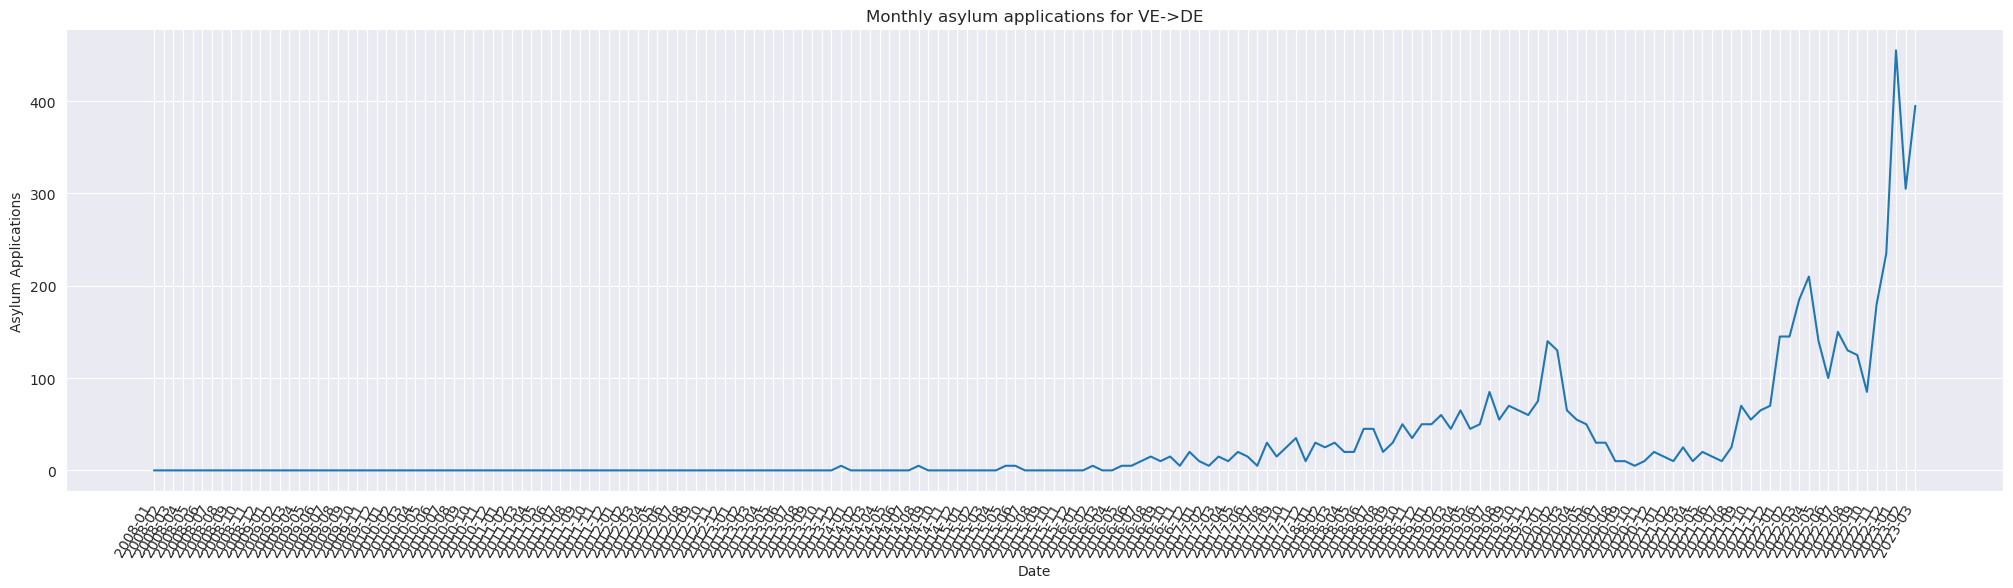

In [83]:
show_asylum_apps(get_dyad(asyl_apps, "VE", "DE"))

/tmp/ipykernel_9157/1792057487.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dyad = asyl_df[asyl_df['citizen'] == origin][asyl_df['geo'] == destination]


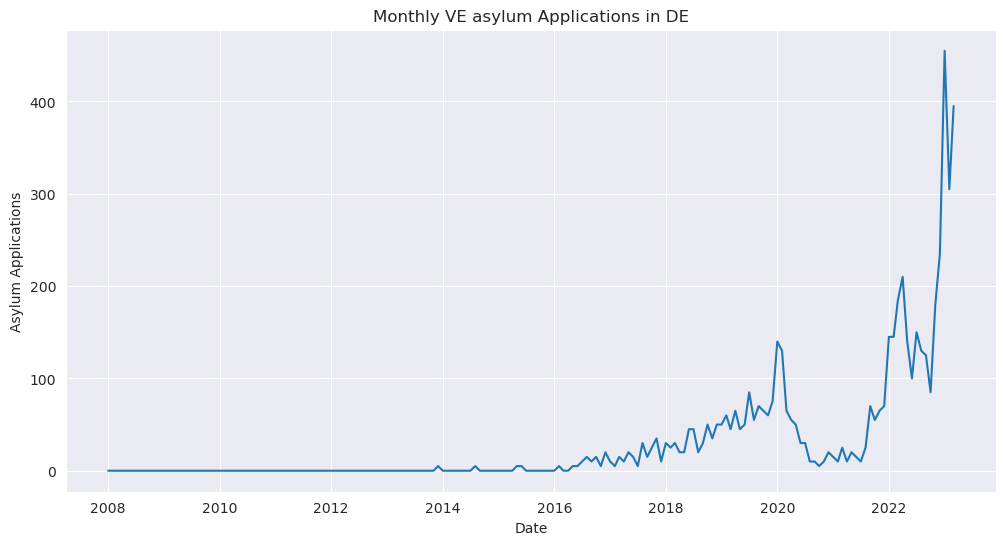

In [60]:
show_asylum_apps(handle, "VE", "DE")

## Preprocessing the quarterly asylum recognitions

In [20]:
handle = pd.read_table("../data/recognition_quarterly.tsv")

In [21]:
asylum_recognition = handle

In [22]:
deconstructed_first_column = [
    line.split(",") for line in asylum_recognition[asylum_recognition.columns[0]]
]
colum1_list = asylum_recognition.columns[0].split(",")

asylum_recognition = asylum_recognition.drop(asylum_recognition.columns[0], axis=1)
first_column = pd.DataFrame(deconstructed_first_column, columns=colum1_list)

In [23]:
first_column = first_column.drop(["unit"], axis=1)

quarterly_recognition = pd.concat([first_column, asylum_recognition], axis=1)

In [24]:
quarterly_recognition = quarterly_recognition.rename(
    columns={"citizen": "from", quarterly_recognition.columns[4]: "to"}
)

In [25]:
quarterly_recognition["decision"].value_counts()

GENCONV      226304
REJECTED     226304
SUB_PROT     226304
TOTAL        226304
TOTAL_POS    226304
HUMSTAT      173056
Name: decision, dtype: int64

In [26]:
quarterly_recognition = quarterly_recognition[quarterly_recognition["sex"] == "T"]
quarterly_recognition = quarterly_recognition[quarterly_recognition["age"] == "TOTAL"]
quarterly_recognition = quarterly_recognition[
    quarterly_recognition["decision"] != "GENCONV"
]
quarterly_recognition = quarterly_recognition[
    quarterly_recognition["decision"] != "REJECTED"
]
quarterly_recognition = quarterly_recognition[
    quarterly_recognition["decision"] != "SUB_PROT"
]
quarterly_recognition = quarterly_recognition[
    quarterly_recognition["decision"] != "HUMSTAT"
]
quarterly_recognition = quarterly_recognition.drop(["sex", "age"], axis=1)

In [27]:
import re

# apply strip() to all items in the data frame
quarterly_recognition = quarterly_recognition.applymap(
    lambda x: x.strip() if isinstance(x, str) else x
)
quarterly_recognition

,from,decision,to,2023Q1,2022Q4,2022Q3,2022Q2,2022Q1,2021Q4,2021Q3,...,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1,2008Q4,2008Q3,2008Q2,2008Q1
3264,AD,TOTAL,AT,:,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3265,AD,TOTAL,BE,:,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3266,AD,TOTAL,BG,:,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3267,AD,TOTAL,CH,:,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3268,AD,TOTAL,CY,:,0,0,0,0,0,0,...,0,0,0,0,0,0,:,:,:,:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301631,ZW,TOTAL_POS,RO,:,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1301632,ZW,TOTAL_POS,SE,:,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1301633,ZW,TOTAL_POS,SI,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1301634,ZW,TOTAL_POS,SK,:,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
quarterly_recognition = quarterly_recognition.replace(":", np.nan)
quarterly_recognition = quarterly_recognition.replace("", np.nan)
quarterly_recognition

,from,decision,to,2023Q1,2022Q4,2022Q3,2022Q2,2022Q1,2021Q4,2021Q3,...,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1,2008Q4,2008Q3,2008Q2,2008Q1
3264,AD,TOTAL,AT,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3265,AD,TOTAL,BE,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3266,AD,TOTAL,BG,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3267,AD,TOTAL,CH,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3268,AD,TOTAL,CY,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301631,ZW,TOTAL_POS,RO,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1301632,ZW,TOTAL_POS,SE,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1301633,ZW,TOTAL_POS,SI,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1301634,ZW,TOTAL_POS,SK,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# replace all values like ': d' with no digits in it with np.nan
quarterly_recognition.iloc[:, 3:] = quarterly_recognition.iloc[:, 3:].applymap(
    lambda x: np.nan
    if isinstance(x, str) and not any(char.isdigit() for char in x)
    else x
)

In [30]:
# define a regular expression to remove non-numeric characters
regex = re.compile(r"[^\d]")

# apply the regular expression to the relevant items
quarterly_recognition.iloc[:, 3:] = quarterly_recognition.iloc[:, 3:].applymap(
    lambda x: int(regex.sub("", x)) if isinstance(x, str) else x
)
quarterly_recognition

,from,decision,to,2023Q1,2022Q4,2022Q3,2022Q2,2022Q1,2021Q4,2021Q3,...,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1,2008Q4,2008Q3,2008Q2,2008Q1
3264,AD,TOTAL,AT,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3265,AD,TOTAL,BE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3266,AD,TOTAL,BG,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3267,AD,TOTAL,CH,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3268,AD,TOTAL,CY,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301631,ZW,TOTAL_POS,RO,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1301632,ZW,TOTAL_POS,SE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1301633,ZW,TOTAL_POS,SI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1301634,ZW,TOTAL_POS,SK,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
quarterly_recognition.to_csv("../data/recognition_quarterly_clean.csv")

## Extract recognition rate table

In [45]:
# quarterly recognition algorythm
handle = pd.read_csv("../data/recognition_quarterly_clean.csv", index_col=0)
qr_decisions = handle

In [46]:
total_recognitions = qr_decisions[qr_decisions["decision"] == "TOTAL"].reset_index(
    drop=True
)
total_recognitions = total_recognitions.replace(0.0, 0.00000001)
total_recognitions

,from,decision,to,2023Q1,2022Q4,2022Q3,2022Q2,2022Q1,2021Q4,2021Q3,...,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1,2008Q4,2008Q3,2008Q2,2008Q1
0,AD,TOTAL,AT,NaN,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08
1,AD,TOTAL,BE,NaN,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08
2,AD,TOTAL,BG,NaN,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08
3,AD,TOTAL,CH,NaN,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08
4,AD,TOTAL,CY,NaN,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,ZW,TOTAL,RO,NaN,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08
7068,ZW,TOTAL,SE,NaN,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,...,1.000000e-08,1.000000e-08,1.000000e-08,5.000000e+00,5.000000e+00,1.000000e-08,5.000000e+00,1.000000e+01,5.000000e+00,1.000000e-08
7069,ZW,TOTAL,SI,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08
7070,ZW,TOTAL,SK,NaN,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08


In [47]:
positive_recognitions = qr_decisions[
    qr_decisions["decision"] == "TOTAL_POS"
].reset_index(drop=True)
positive_recognitions

,from,decision,to,2023Q1,2022Q4,2022Q3,2022Q2,2022Q1,2021Q4,2021Q3,...,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1,2008Q4,2008Q3,2008Q2,2008Q1
0,AD,TOTAL_POS,AT,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AD,TOTAL_POS,BE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AD,TOTAL_POS,BG,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AD,TOTAL_POS,CH,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AD,TOTAL_POS,CY,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,ZW,TOTAL_POS,RO,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7068,ZW,TOTAL_POS,SE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7069,ZW,TOTAL_POS,SI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7070,ZW,TOTAL_POS,SK,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# preliminary template of the general recognition rate data frame
recognition_rate = positive_recognitions.drop("decision", axis=1)
recognition_rate.iloc[:, 2:] = round(
    (positive_recognitions.iloc[:, 3:] / total_recognitions.iloc[:, 3:]) * 100, 2
)
recognition_rate

,from,to,2023Q1,2022Q4,2022Q3,2022Q2,2022Q1,2021Q4,2021Q3,2021Q2,...,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1,2008Q4,2008Q3,2008Q2,2008Q1
0,AD,AT,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,AD,BE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,AD,BG,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,AD,CH,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,AD,CY,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,ZW,RO,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
7068,ZW,SE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
7069,ZW,SI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
7070,ZW,SK,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [49]:
# We ['from','to'] the dyad values to the index
recognition_rate = recognition_rate.set_index(["from", "to"])
# We transpose it so the months columns are now the vertical index
# and the dyads are accesible as horizontal indexes
recognition_rate = recognition_rate.T
recognition_rate = recognition_rate.rename_axis("date")
# We convert the date index to datetime format
recognition_rate.index = recognition_rate.index.str.strip()
recognition_rate.index = pd.PeriodIndex(recognition_rate.index, freq="Q").to_timestamp()

from         AD                                               ...   ZW         \
to           AT   BE   BG   CH   CY   CZ   DE   DK   EE   EL  ...   MT     NL   
date                                                          ...               
2023-01-01  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  0.0  NaN  ...  NaN    0.0   
2022-10-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2022-07-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2022-04-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2022-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
2009-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2008-10-01  0.0  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  100.0   
2008-07-01  0.0  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2008-04-01  0.0  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2008-01-01  0.0  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  100.0   

from                                                  
to           NO   PL   PT   RO   SE   SI   SK     UK  
date                                                  
2023-01-01  0.0  NaN  NaN  NaN  NaN  0.0  NaN    NaN  
2022-10-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0    NaN  
2022-07-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0    NaN  
2022-04-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0    NaN  
2022-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0    NaN  
...         ...  ...  ...  ...  ...  ...  ...    ...  
2009-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  76.77  
2008-10-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  41.57  
2008-07-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  18.94  
2008-04-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  17.65  
2008-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  31.37  

[61 rows x 7072 columns]

In [52]:
recognition_rate = recognition_rate[::-1]
recognition_rate

from         AD                                               ...   ZW         \
to           AT   BE   BG   CH   CY   CZ   DE   DK   EE   EL  ...   MT     NL   
date                                                          ...               
2008-01-01  0.0  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  100.0   
2008-04-01  0.0  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2008-07-01  0.0  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2008-10-01  0.0  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  100.0   
2009-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
2022-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2022-04-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2022-07-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2022-10-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2023-01-01  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  0.0  NaN  ...  NaN    0.0   

from                                                  
to           NO   PL   PT   RO   SE   SI   SK     UK  
date                                                  
2008-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  31.37  
2008-04-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  17.65  
2008-07-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  18.94  
2008-10-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  41.57  
2009-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  76.77  
...         ...  ...  ...  ...  ...  ...  ...    ...  
2022-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0    NaN  
2022-04-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0    NaN  
2022-07-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0    NaN  
2022-10-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0    NaN  
2023-01-01  0.0  NaN  NaN  NaN  NaN  0.0  NaN    NaN  

[61 rows x 7072 columns]

In [53]:
recognition_rate.to_csv("../data/recognition_rates.csv")

### Nexts steps: clock align the recognition rates to at least monthly data.

In [7]:
rr = pd.read_csv(
    "../data/recognition_rates.csv", index_col=0, header=[0, 1], parse_dates=True
)
rr

MultiIndex([('AD', 'AT'),
            ('AD', 'BE'),
            ('AD', 'BG'),
            ('AD', 'CH'),
            ('AD', 'CY'),
            ('AD', 'CZ'),
            ('AD', 'DE'),
            ('AD', 'DK'),
            ('AD', 'EE'),
            ('AD', 'EL'),
            ...
            ('ZW', 'MT'),
            ('ZW', 'NL'),
            ('ZW', 'NO'),
            ('ZW', 'PL'),
            ('ZW', 'PT'),
            ('ZW', 'RO'),
            ('ZW', 'SE'),
            ('ZW', 'SI'),
            ('ZW', 'SK'),
            ('ZW', 'UK')],
           names=['from', 'to'], length=7072)

In [19]:
start_date = "2008-01-01"
end_date = "2023-01-01"  # pd.to_datetime('today')  # Get the current month and year
monthly_index = pd.date_range(
    start=start_date, end=end_date, freq=pd.offsets.MonthBegin()
)
rr = rr.reindex(monthly_index).interpolate(method="linear")

from         AD                                               ...   ZW  \
to           AT   BE   BG   CH   CY   CZ   DE   DK   EE   EL  ...   MT   
2008-01-01  0.0  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2008-02-01  0.0  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2008-03-01  0.0  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2008-04-01  0.0  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2008-05-01  0.0  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2022-09-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2022-10-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2022-11-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2022-12-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2023-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

from                                                                  
to                  NL   NO   PL   PT   RO   SE   SI   SK         UK  
2008-01-01  100.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  31.370000  
2008-02-01   66.666667  0.0  0.0  0.0  0.0  0.0  0.0  0.0  26.796667  
2008-03-01   33.333333  0.0  0.0  0.0  0.0  0.0  0.0  0.0  22.223333  
2008-04-01    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  17.650000  
2008-05-01    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  18.080000  
...                ...  ...  ...  ...  ...  ...  ...  ...        ...  
2022-09-01    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  
2022-10-01    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  
2022-11-01    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  
2022-12-01    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  
2023-01-01    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  

[181 rows x 7072 columns]

In [21]:
rr.to_csv("../data/recognition_rates_interpolated.csv")

In [112]:
dyad = get_dyad(recognition_rate, "VE", "DE")
dyad

/tmp/ipykernel_9157/1652772601.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['citizen'] == origin][df['geo'] == destination]


,citizen,geo,2023Q1,2022Q4,2022Q3,2022Q2,2022Q1,2021Q4,2021Q3,2021Q2,...,2010Q2,2010Q1,2009Q4,2009Q3,2009Q2,2009Q1,2008Q4,2008Q3,2008Q2,2008Q1
6772,VE,DE,26.79,35.71,22.73,27.5,34.62,43.48,55.56,54.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
pd.melt(dyad.iloc[:, 2:]).set_index("variable").index

Index(['2023Q1 ', '2022Q4 ', '2022Q3 ', '2022Q2 ', '2022Q1 ', '2021Q4 ',
       '2021Q3 ', '2021Q2 ', '2021Q1 ', '2020Q4 ', '2020Q3 ', '2020Q2 ',
       '2020Q1 ', '2019Q4 ', '2019Q3 ', '2019Q2 ', '2019Q1 ', '2018Q4 ',
       '2018Q3 ', '2018Q2 ', '2018Q1 ', '2017Q4 ', '2017Q3 ', '2017Q2 ',
       '2017Q1 ', '2016Q4 ', '2016Q3 ', '2016Q2 ', '2016Q1 ', '2015Q4 ',
       '2015Q3 ', '2015Q2 ', '2015Q1 ', '2014Q4 ', '2014Q3 ', '2014Q2 ',
       '2014Q1 ', '2013Q4 ', '2013Q3 ', '2013Q2 ', '2013Q1 ', '2012Q4 ',
       '2012Q3 ', '2012Q2 ', '2012Q1 ', '2011Q4 ', '2011Q3 ', '2011Q2 ',
       '2011Q1 ', '2010Q4 ', '2010Q3 ', '2010Q2 ', '2010Q1 ', '2009Q4 ',
       '2009Q3 ', '2009Q2 ', '2009Q1 ', '2008Q4 ', '2008Q3 ', '2008Q2 ',
       '2008Q1 '],
      dtype='object', name='variable')

In [122]:
def dyad_recognition_timeseries(recognition_rates, origin, destination):
    dyad = get_dyad(recognition_rates, origin, destination)
    dyad_recognitionTS = pd.melt(
        dyad.iloc[:, 2:], var_name="quarter", value_name="recognition_rate"
    ).set_index("quarter")
    dyad_recognitionTS.index = dyad_recognitionTS.index.str.strip()
    dyad_recognitionTS.index = pd.PeriodIndex(
        dyad_recognitionTS.index, freq="Q"
    ).to_timestamp()
    return dyad_recognitionTS

In [123]:
dyad_recognition_timeseries(recognition_rate, "VE", "DE")

/tmp/ipykernel_9157/1652772601.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['citizen'] == origin][df['geo'] == destination]


,recognition_rate
quarter,
2023-01-01,26.79
2022-10-01,35.71
2022-07-01,22.73
2022-04-01,27.50
2022-01-01,34.62
...,...
2009-01-01,0.00
2008-10-01,0.00
2008-07-01,0.00


## Atomatize lineplotting for different dyads

In [83]:
handle = pd.read_csv("../data/recognition_rates.csv", index_col=0)
recognition_rates = handle

In [132]:
recognition_rates

pandas.core.series.Series

In [124]:
VE_DE_recognitions = dyad_recognition_timeseries(recognition_rates, "VE", "DE")

/tmp/ipykernel_9157/1652772601.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['citizen'] == origin][df['geo'] == destination]


In [125]:
VE_DE_recognitions

,recognition_rate
quarter,
2023-01-01,26.79
2022-10-01,35.71
2022-07-01,22.73
2022-04-01,27.50
2022-01-01,34.62
...,...
2009-01-01,0.00
2008-10-01,0.00
2008-07-01,0.00


In [126]:
def plot_recognition_rates(recognition_rates, origin, destination):
    dyad_TS = dyad_recognition_timeseries(recognition_rates, origin, destination)
    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=dyad_TS, x=dyad_TS.index, y="recognition_rate")

    # set x-axis label and title
    plt.xlabel("Date")
    plt.ylabel("recognition rate")
    plt.title(
        f"Quarterly recognition rates from {origin} asylum applications in {destination}"
    )

    plt.show()

/tmp/ipykernel_9157/1652772601.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['citizen'] == origin][df['geo'] == destination]


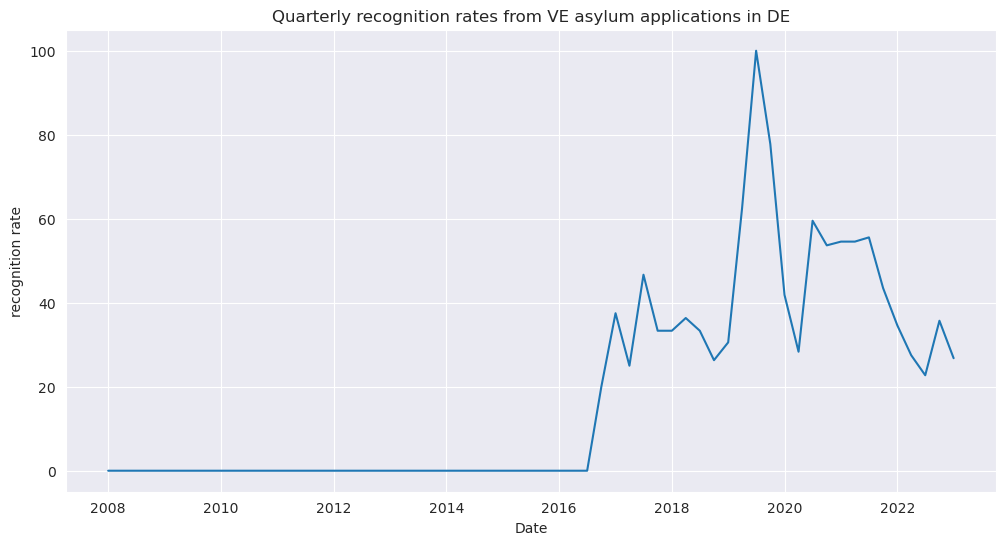

In [127]:
plot_recognition_rates(recognition_rates, "VE", "DE")

/tmp/ipykernel_9157/1652772601.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['citizen'] == origin][df['geo'] == destination]


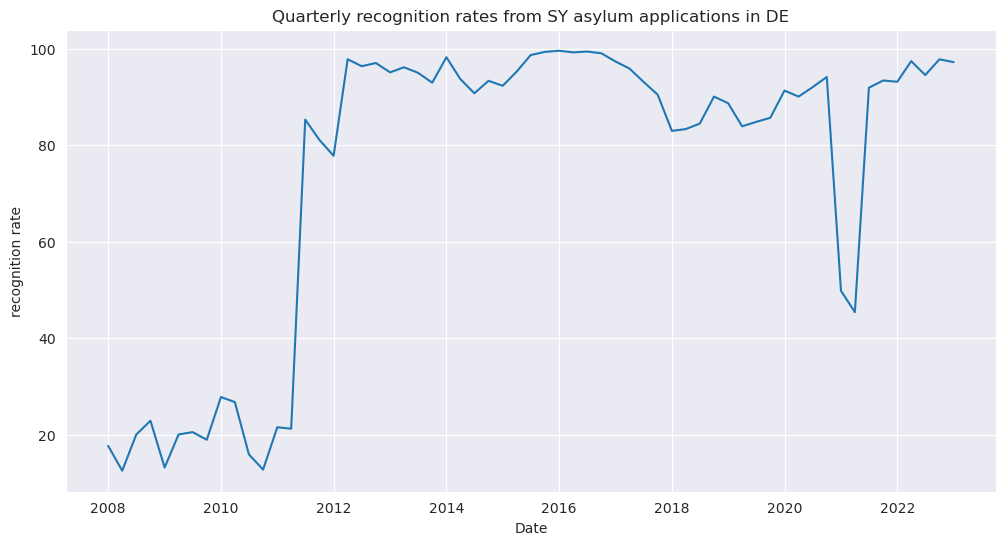

In [128]:
plot_recognition_rates(recognition_rates, "SY", "DE")

In [ ]:
plot_recognition_rates(recognition_rates, "UA", "EU27_2020")